In [1]:
# Import libraries. 
# Generate images in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import gzip
import itertools
import numpy as np
import os
import time
import pandas as pd
import seaborn as sns

import bokeh
import bokeh.io
from bokeh.io import push_notebook
from bokeh.plotting import figure, show, save, output_notebook, output_file

# Import colour palettes for later on
from bokeh.palettes import Category20b
from bokeh.palettes import Purples
from bokeh.palettes import Greens
from bokeh.palettes import YlOrBr
from bokeh.palettes import YlOrRd
from bokeh.palettes import PuOr
from bokeh.palettes import RdGy

# Dimension reduction tools
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
import umap 

/Users/gozdecilingir/mambaforge/envs/beyond/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/gozdecilingir/mambaforge/envs/beyond/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/gozdecilingir/mambaforge/envs/beyond/lib/pyth

In [2]:
#loading population data
#population_names = pd.read_csv('oryx_pop_info_sorted_46_final.txt', sep='\t', header=0)
population_names = pd.read_csv('galap_pop_info.txt', sep='\t', header=0)

#print(population_names)

In [3]:
#Generate the pandas dataframe called Data_Struct
Data_Struct=population_names

In [9]:
#load the covariance matrix

#cov_mat_deneme=pd.read_csv('oryx_6xyh.cov',sep=' ', header=None)
#cov_mat_deneme=pd.read_csv('oryx_2xyh.cov',sep=' ', header=None)
#cov_mat_deneme=pd.read_csv('oryx_0.5xyh.cov',sep=' ', header=None)

#cov_mat_deneme=pd.read_csv('galap_8x.cov',sep=' ', header=None)
#cov_mat_deneme=pd.read_csv('galap_2x.cov',sep=' ', header=None)
cov_mat_deneme=pd.read_csv('galap_0.5x.cov',sep=' ', header=None)

cov_mat_np=cov_mat_deneme.to_numpy()

print(cov_mat_deneme.shape)
print(cov_mat_np.shape)
#print(cov_mat_deneme.head(1))


#sns.heatmap(cov_mat_np)
#print(cov_mat_np)

(38, 38)
(38, 38)


In [10]:
# calculating eigen vectors and eigen values from the initial covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat_np)

# sorting them from largest to smallest

idx = eigen_vals.argsort()[::-1]   
eigenValues = eigen_vals[idx]
eigenVectors = eigen_vecs[:,idx]

# Step 1: Centering
#centered_eigenvectors = eigenVectors - np.mean(eigenVectors, axis=0)

# Step 2: Scaling by Eigenvalue (Optional)
# Load eigenvalues from PCAngsd's output (replace with your eigenvalue loading code)


#scaled_eigenvectors = eigenVectors * eigenValues[:, np.newaxis]
#scaled_eigenvectors = eigenVectors * (eigenValues / np.abs(eigenValues)).reshape(1, -1)
#scaled_eigenvectors = eigenVectors / np.std(eigenVectors, axis=0)
#scaled_eigenvectors = eigenVectors * np.sqrt(eigenValues)
scaled_eigenvectors = eigenVectors * eigenValues

pca_data_array = np.array(scaled_eigenvectors).astype(float)
# Now scaled_eigenvectors contains the transformed eigenvectors


#eigvec_mltply_val=eigenVectors.real*eigenValues.real # this is the weighted PCA

#checking the dimensions
print(pca_data_array.shape)
#print(eigvec_mltply_val.shape)

(38, 38)


In [11]:
# calculating the total explained variance
expl_pre=eigenValues/sum(eigenValues)
expl=np.cumsum(expl_pre)

expl_df=pd.DataFrame(expl_pre*100,columns=['explained_variance'])
expl_df['cumulative_expl']=expl*100
expl_df.set_index(np.arange(1, eigenVectors.shape[0] + 1), inplace=True)
print(expl_df)
print(expl_df.shape)

    explained_variance  cumulative_expl
1             4.949690         4.949690
2             2.938770         7.888460
3             2.826745        10.715204
4             2.777850        13.493055
5             2.723859        16.216914
6             2.706575        18.923488
7             2.698862        21.622351
8             2.678128        24.300479
9             2.671540        26.972019
10            2.663481        29.635500
11            2.658132        32.293632
12            2.645039        34.938672
13            2.630351        37.569022
14            2.627339        40.196361
15            2.623518        42.819879
16            2.616511        45.436390
17            2.615747        48.052137
18            2.610486        50.662623
19            2.600767        53.263390
20            2.597227        55.860617
21            2.594498        58.455115
22            2.592583        61.047698
23            2.582270        63.629969
24            2.579739        66.209707


In [12]:
Data_Struct['EigenVect1']=pca_data_array[:,0]
Data_Struct['EigenVect2']=pca_data_array[:,1]
Data_Struct['EigenVect3']=pca_data_array[:,2]
Data_Struct['EigenVect4']=pca_data_array[:,3]
#print(Data_Struct.head(5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


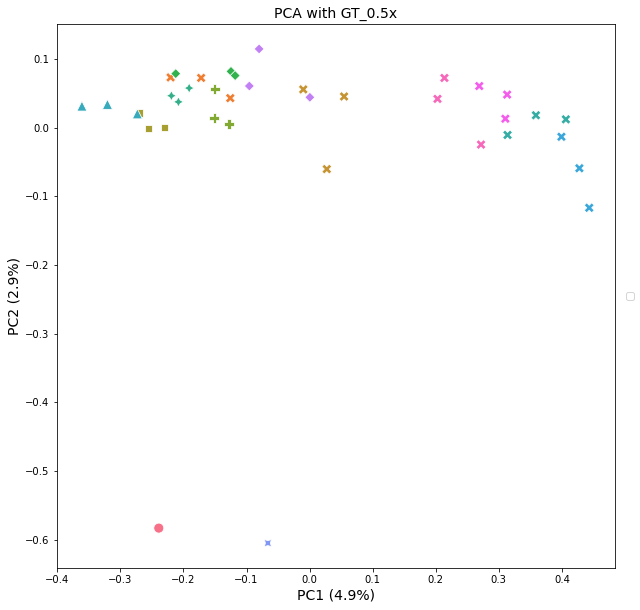

In [13]:
fig, axs = plt.subplots(1, 1,figsize=(10, 10))

#axs[1,1] = Data_Struct.plot.scatter(x='X1',y='X2',c='Population')
#sns.scatterplot(ax=axs,data=Data_Struct, x='EigenVect1', y='EigenVect2', hue='Population',legend = False, s = 200).set(title='PCA with SO_6x')
ax = sns.scatterplot(data=Data_Struct, x='EigenVect1', y='EigenVect2', hue='Species', style='Location', legend= False, s=100)
ax.set_title('PCA with GT_0.5x', fontsize=14)
ax.set_xlabel(f"PC1 ({round(expl_df['explained_variance'][1],1)}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({round(expl_df['explained_variance'][2],1)}%)", fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)
#plt.show()
plt.savefig('0.5x_galap_PCA.png',dpi=300,transparent = False,facecolor='white')
#sns.scatterplot(ax=axs[1],data=Data_Struct, x='tSNE1', y='tSNE2', hue='Population',style='Population',legend = False, s = 80).set(title='t-SNE from PCA (Top 5 PCs / 19%)')
#sns.scatterplot(ax=axs[2],data=Data_Struct, x='UMAP1', y='UMAP2', hue='Population',style='Population', s = 80).set(title='UMAP from PCA (Top 5 PCs / 19%)')
#for i in range(1,143):
#    plt.text(x=Data_Struct['UMAP1_multip'][i]+0.05, y=Data_Struct['UMAP2_multip'][i],s=Data_Struct['Sample'][i])
    
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


#plt.savefig('0.5x_eep_usa_PCA_tSNE_UMAP_top5PCs.png',dpi=100,transparent = False,facecolor='white')

#plt.savefig('0.5x_eep_usa_PCA_tSNE_UMAP_top5PCs.pdf',dpi=200,transparent = False,facecolor='white')

In [ ]:
#single plot with text
#fig, axs = plt.subplots(1, 1,figsize=(6, 6))

#sns.scatterplot(ax=axs,data=Data_Struct, x='UMAP1', y='UMAP2', hue='Population', s=200).set(title='PCA 6x')

#for i in range(1,48):
    #plt.text(x=Data_Struct['UMAP1'][i]+0.05, y=Data_Struct['UMAP2'][i],s=Data_Struct['Sample'][i])
    
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('tSNE_with_Samplenametexts_v2.png',dpi=100,transparent = False,facecolor='white')